# Application of our Workflow onto two datasets

In [1]:
# Import useful functions and librairies
from functions import * 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Path to our datasets
BANKNOTE = "./data_banknote_authentication.txt"
KIDNEY = "./kidney_disease.csv"

## 1. Load and clean data
* Load and clean data
* Center and normalize data

In [3]:
banknote = clean_file(BANKNOTE)
kidney = clean_file(KIDNEY)

---START CLEANING :  ./data_banknote_authentication.txt ---
Toutes les valeurs manquantes ont été remplacées
La table est normalisée
---END CLEANING : ./data_banknote_authentication.txt ---

---START CLEANING :  ./kidney_disease.csv ---
Toutes les valeurs manquantes ont été remplacées
La table est normalisée
---END CLEANING : ./kidney_disease.csv ---



In [4]:
banknote.describe().loc[['mean','std'],:]

,0,1,2,3,4
mean,8.286213e-17,0.0,0.0,-5.437827e-17,0.444606
std,1.000000e+00,1.0,1.0,1.000000e+00,0.497103


In [5]:
kidney.describe().loc[['mean','std'],:]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
mean,199.500000,5.062617e-16,7.460699e-16,2.273737e-15,0.0,0.0,0.117500,0.190000,0.105000,0.055000,...,15.722500,25.900000,14.690000,0.632500,0.65750,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,0.322418,0.392792,0.306937,0.228266,...,10.905863,23.970533,16.030325,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729


We can see that numerical values are centered (mean = 0) and normalized (std = 1)

## 2. Split data into train and test

In [6]:
KIDNEY_DATA,KIDNEY_LABEL = getDataLabels(kidney)
BANKNOTE_DATA,BANKNOTE_LABEL = getDataLabels(banknote)

In [7]:
K_X_train,K_X_test,K_y_train,K_y_test = train_test(KIDNEY_DATA,KIDNEY_LABEL,.3,False)
B_X_train,B_X_test,B_y_train,B_y_test = train_test(BANKNOTE_DATA,BANKNOTE_LABEL,.3,False)

In [8]:
# Applique PCA aux données
K_X_train_PCA, K_X_test_PCA, K_n_comp = pca(np.array(K_X_train), np.array(K_X_test))
B_X_train_PCA, B_X_test_PCA, B_n_comp = pca(np.array(B_X_train), np.array(B_X_test))

print(K_n_comp, B_n_comp)

4 4


Text(0.5, 0.92, 'PCA avec 3 composantes pour Banknote dataset')

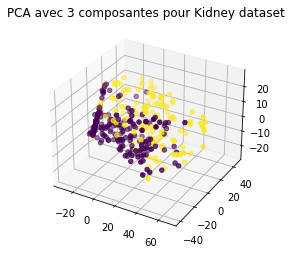

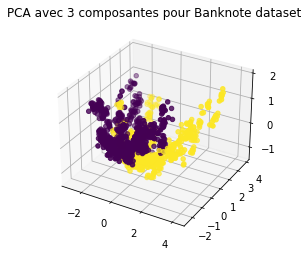

In [9]:
rep_data(K_X_train_PCA, K_X_test_PCA, K_y_train, K_y_test)
plt.title("PCA avec 3 composantes pour Kidney dataset")
rep_data(B_X_train_PCA, B_X_test_PCA, B_y_train, B_y_test)
plt.title("PCA avec 3 composantes pour Banknote dataset")

Text(0.5, 1.0, 'Explained variance for kidney dataset')

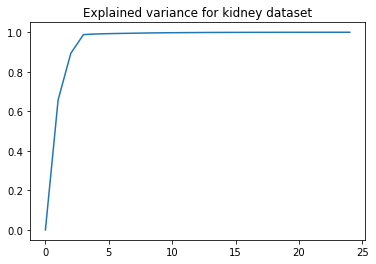

In [10]:
explained_variance(K_X_train, K_X_test)
plt.title("Explained variance for kidney dataset")

Text(0.5, 1.0, 'Explained variance for banknote dataset')

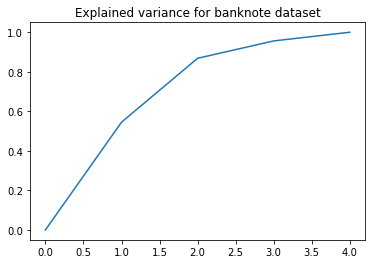

In [11]:
explained_variance(B_X_train, B_X_test)
plt.title("Explained variance for banknote dataset")

## 3. Train models

In [12]:
K_SVM = trainSVM(K_X_train,K_y_train)
K_SVM_PCA = trainSVM(K_X_train_PCA,K_y_train)

B_SVM = trainSVM(B_X_train,B_y_train)

In [13]:
K_LOGISTIC = trainLogisticRegression(K_X_train,K_y_train)
K_LOGISTIC_PCA = trainLogisticRegression(K_X_train_PCA,K_y_train)

B_LOGISTIC = trainLogisticRegression(B_X_train,B_y_train)

In [14]:
K_DF = trainDecisionForest(K_X_train,K_y_train, 100)
K_DF_PCA = trainDecisionForest(K_X_train_PCA,K_y_train, 100)
B_DF = trainDecisionForest(B_X_train,B_y_train, 100)

K_AB = trainAdaBoost(K_X_train,K_y_train, 100)
K_AB_PCA = trainAdaBoost(K_X_train_PCA,K_y_train, 100)
B_AB = trainAdaBoost(B_X_train,B_y_train, 100)

## 4. Cross Validation

In [15]:
K_SVM = crossValidationProcedure(K_SVM,K_X_train,K_y_train,"kernel",["linear","poly","rbf","sigmoid"])
K_SVM_PCA = crossValidationProcedure(K_SVM_PCA,K_X_train_PCA,K_y_train,"kernel",["linear","poly","rbf","sigmoid"])
B_SVM = crossValidationProcedure(B_SVM,B_X_train,B_y_train,"kernel",["linear","poly","rbf","sigmoid"])

best kernel = linear
best kernel = linear
best kernel = rbf


## 5. Test models

In [16]:
K_SVM_pred = testSVM(K_SVM,K_X_test)
K_SVM_PCA_pred = testSVM(K_SVM_PCA,K_X_test_PCA)
B_SVM_pred = testSVM(B_SVM,B_X_test)

K_LOGISTIC_pred = testLogReg(K_LOGISTIC,K_X_test)
K_LOGISTIC_PCA_pred = testLogReg(K_LOGISTIC_PCA,K_X_test_PCA)
B_LOGISTIC_pred = testLogReg(B_LOGISTIC,B_X_test)

K_DF_pred = testDecisionForest(K_DF, K_X_test)
K_DF_PCA_pred = testDecisionForest(K_DF_PCA, K_X_test_PCA)
B_DF_pred = testDecisionForest(B_DF, B_X_test)

K_AB_pred = testAdaBoost(K_AB, K_X_test)
K_AB_PCA_pred = testAdaBoost(K_AB_PCA, K_X_test_PCA)
B_AB_pred = testAdaBoost(B_AB, B_X_test)

K_KM_pred = testKmeans(K_X_train, K_y_train, K_X_test)
K_KM_PCA_pred = testKmeans(K_X_train_PCA, K_y_train, K_X_test_PCA)
B_KM_pred = testKmeans(B_X_train, B_y_train, B_X_test)

## 6. Validate models

Your model has an accuracy of : 98.33333333333333%
Your model has a recall of : 95.55555555555556%
Your model's F1 score = 0.9772727272727273 


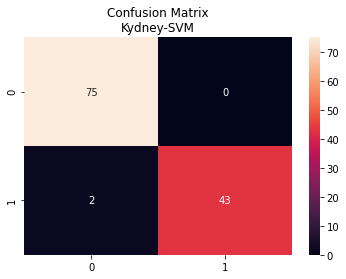

In [17]:
# Kidney SVM
confusionMatrix(K_y_test,K_SVM_pred,title="Confusion Matrix\nKydney-SVM")
validateModel(K_y_test,K_SVM_pred)

Your model has an accuracy of : 96.66666666666667%
Your model has a recall of : 95.55555555555556%
Your model's F1 score = 0.9555555555555556 


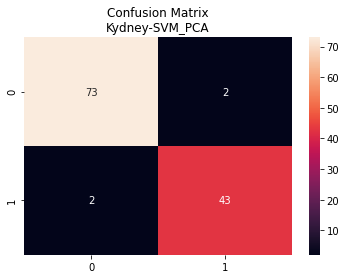

In [18]:
# Kidney SVM_PCA
confusionMatrix(K_y_test,K_SVM_PCA_pred,title="Confusion Matrix\nKydney-SVM_PCA")
validateModel(K_y_test,K_SVM_PCA_pred)

Your model has an accuracy of : 97.5%
Your model has a recall of : 95.55555555555556%
Your model's F1 score = 0.9662921348314608 


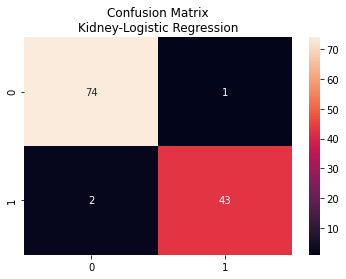

In [19]:
# Kidney Logistic
confusionMatrix(K_y_test,K_LOGISTIC_pred,title="Confusion Matrix\nKidney-Logistic Regression")
validateModel(K_y_test,K_LOGISTIC_pred)

Your model has an accuracy of : 96.66666666666667%
Your model has a recall of : 95.55555555555556%
Your model's F1 score = 0.9555555555555556 


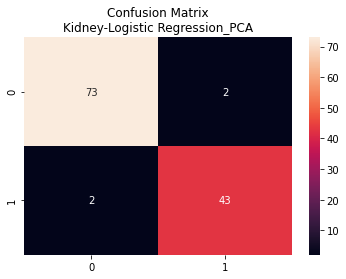

In [20]:
# Kidney Logistic_PCA
confusionMatrix(K_y_test,K_LOGISTIC_PCA_pred,title="Confusion Matrix\nKidney-Logistic Regression_PCA")
validateModel(K_y_test,K_LOGISTIC_PCA_pred)

Your model has an accuracy of : 99.16666666666667%
Your model has a recall of : 97.77777777777777%
Your model's F1 score = 0.9887640449438202 


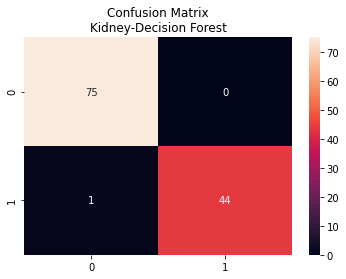

In [21]:
# Kidney Decision Forest
confusionMatrix(K_y_test,K_DF_pred,title="Confusion Matrix\nKidney-Decision Forest")
validateModel(K_y_test,K_DF_pred)

Your model has an accuracy of : 95.83333333333334%
Your model has a recall of : 93.33333333333333%
Your model's F1 score = 0.9438202247191012 


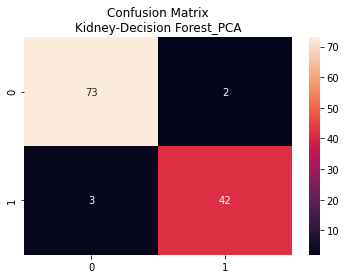

In [22]:
# Kidney Decision Forest_PCA
confusionMatrix(K_y_test,K_DF_PCA_pred,title="Confusion Matrix\nKidney-Decision Forest_PCA")
validateModel(K_y_test,K_DF_PCA_pred)

Your model has an accuracy of : 100.0%
Your model has a recall of : 100.0%
Your model's F1 score = 1.0 


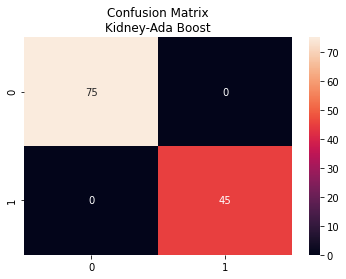

In [23]:
# Kidney Ada Boost
confusionMatrix(K_y_test,K_AB_pred,title="Confusion Matrix\nKidney-Ada Boost")
validateModel(K_y_test,K_AB_pred)

Your model has an accuracy of : 95.0%
Your model has a recall of : 93.33333333333333%
Your model's F1 score = 0.9333333333333333 


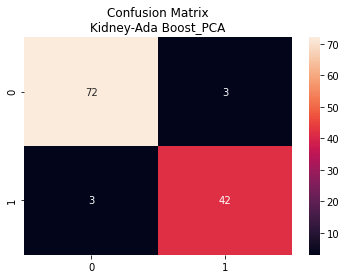

In [24]:
# Kidney Ada Boost_PCA
confusionMatrix(K_y_test,K_AB_PCA_pred,title="Confusion Matrix\nKidney-Ada Boost_PCA")
validateModel(K_y_test,K_AB_PCA_pred)

In [25]:
# Kidney K-Means
# confusionMatrix(K_y_test,K_LOGISTIC_pred,title="Confusion Matrix") → EST CE QU'ON PEUT L'APPLIQUER SUR KMEANS ??
validateModel(K_y_test,K_KM_pred)

Your model has an accuracy of : 70.83333333333334%
Your model has a recall of : 64.44444444444444%
Your model's F1 score = 0.6236559139784946 


In [26]:
# Kidney K-Means_PCA
# confusionMatrix(K_y_test,K_LOGISTIC_pred,title="Confusion Matrix") → EST CE QU'ON PEUT L'APPLIQUER SUR KMEANS ??
validateModel(K_y_test,K_KM_PCA_pred)

Your model has an accuracy of : 70.83333333333334%
Your model has a recall of : 64.44444444444444%
Your model's F1 score = 0.6236559139784946 


Your model has an accuracy of : 99.27184466019418%
Your model has a recall of : 100.0%
Your model's F1 score = 0.9919571045576407 


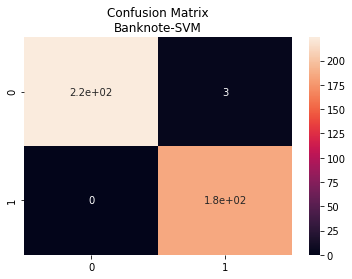

In [27]:
# Banknote SVM
confusionMatrix(B_y_test,B_SVM_pred,title="Confusion Matrix\nBanknote-SVM")
validateModel(B_y_test,B_SVM_pred)

Your model has an accuracy of : 97.0873786407767%
Your model has a recall of : 99.45945945945947%
Your model's F1 score = 0.968421052631579 


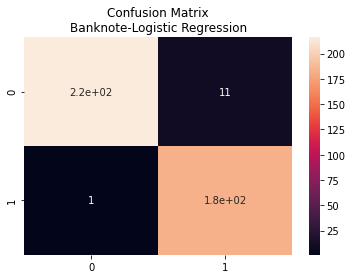

In [28]:
# Banknote Logistic
confusionMatrix(B_y_test,B_LOGISTIC_pred,title="Confusion Matrix\nBanknote-Logistic Regression")
validateModel(B_y_test,B_LOGISTIC_pred)

Your model has an accuracy of : 99.27184466019418%
Your model has a recall of : 100.0%
Your model's F1 score = 0.9919571045576407 


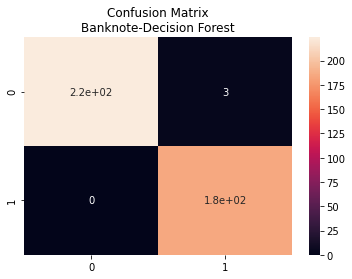

In [29]:
# Banknote Decision Forest
confusionMatrix(B_y_test,B_DF_pred,title="Confusion Matrix\nBanknote-Decision Forest")
validateModel(B_y_test,B_DF_pred)

Your model has an accuracy of : 98.7864077669903%
Your model has a recall of : 98.37837837837839%
Your model's F1 score = 0.986449864498645 


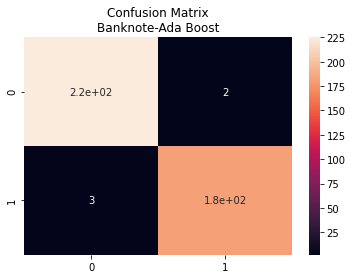

In [30]:
# Banknote Ada Boost
confusionMatrix(B_y_test,B_AB_pred,title="Confusion Matrix\nBanknote-Ada Boost")
validateModel(B_y_test,B_AB_pred)

In [31]:
# Banknote K-Means
validateModel(B_y_test,B_KM_pred)

Your model has an accuracy of : 54.12621359223301%
Your model has a recall of : 54.054054054054056%
Your model's F1 score = 0.5141388174807198 
